# Homework 4

For this assignment, you will be developing an artificial neural network to classify data given in the __[Dry Beans Data Set](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#)__. This data set was obtained as a part of a research study by Selcuk University, Turkey, in which a computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features. More details on the study can be found in the following __[research paper](https://www.sciencedirect.com/science/article/pii/S0168169919311573)__. <br>
### **Make sure to use the lecture notebook on an introduction to keras and cross validation located [here](https://colab.research.google.com/drive/1ksEGL7SJ_wutCIyPYx7Loe5EPdOij6dJ?usp=sharing) and [here](https://colab.research.google.com/drive/1C9Mwf1J2ril1Q4l6n2BjQMb8YaFySG5_?usp=sharing)**.

## About the Data Set
Seven different types of dry beans were used in a study in Selcuk University, Turkey, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the **classification** model, images of 13611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features - 12 dimensions and 4 shape forms - were obtained from the grains.

Number of Instances (records in the data set): __13611__

Number of Attributes (fields within each record, including the class): __17__

### Data Set Attribute Information:

1. __Area (A)__ : The area of a bean zone and the number of pixels within its boundaries.
2. __Perimeter (P)__ : Bean circumference is defined as the length of its border.
3. __Major axis length (L)__ : The distance between the ends of the longest line that can be drawn from a bean.
4. __Minor axis length (l)__ : The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. __Aspect ratio (K)__ : Defines the relationship between L and l.
6. __Eccentricity (Ec)__ : Eccentricity of the ellipse having the same moments as the region.
7. __Convex area (C)__ : Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. __Equivalent diameter (Ed)__ : The diameter of a circle having the same area as a bean seed area.
9. __Extent (Ex)__ : The ratio of the pixels in the bounding box to the bean area.
10. __Solidity (S)__ : Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. __Roundness (R)__ : Calculated with the following formula: (4piA)/(P^2)
12. __Compactness (CO)__ : Measures the roundness of an object: Ed/L
13. __ShapeFactor1 (SF1)__
14. __ShapeFactor2 (SF2)__
15. __ShapeFactor3 (SF3)__
16. __ShapeFactor4 (SF4)__

17. __Classes : *Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira*__

### Libraries that can be used :
- NumPy, SciPy, Pandas, Sci-Kit Learn, TensorFlow, Keras. You may also use PyTorch (though support may be limited)
- Any other library used during the lectures and discussion sessions.

### Other Notes
- Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of this assignment.
- Discussion and Lecture materials should be helpful for doing the assignments.
- The homework submission should be a .ipynb file.


In [ ]:
!git clone https://github.com/ucsd-cse151a-f24/hw4.git

Cloning into 'hw4'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 63 (delta 36), reused 7 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 1.58 MiB | 4.75 MiB/s, done.
Resolving deltas: 100% (36/36), done.



## Exercise 1 : Building a Feed-Forward Neural Network(50 points)

### Exercise 1.1 : Data Preprocessing (10 points)

- As the classes are categorical, use one-hot encoding to represent the set of classes. You will find this useful when developing the output layer of the neural network.
- Split the data into training and testing set by __90:10__ and use the training set for training the model and the test set to evaluate the model performance. Please set verbose=0 to suppress output during training.
- Normalize each field of the input data using the min-max normalization technique.

__Notes:__

- Splitting of the dataset should be done __before__ the normalization step and __after__ the one-hot encoding.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the data set
file_path = "/content/hw4/Dry_Beans_Dataset.csv"
df = pd.read_csv(file_path)

In [ ]:
# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# One-hot encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Print the shapes of the preprocessed data
print("X shape:", X_scaled.shape)
print("y shape:", y_onehot.shape)
print()

X shape: (13611, 16)
y shape: (13611, 7)



In [ ]:
# Split the data into training and testing sets (90:10 ratio)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.1, random_state=42)

In [ ]:
# Print the shapes of the preprocessed data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print()

X_train shape: (12249, 16)
y_train shape: (12249, 7)
X_test shape: (1362, 16)
y_test shape: (1362, 7)



### Exercise 1.2 : Training and Testing the Neural Network (40 points)

Design a 3-layer (3 hidden layers and this does not include the input or output layer) artificial deep neural network, specifically a feed-forward multi-layer perceptron (using the sigmoid activation function), to classify the type of 'Dry Bean' given the other attributes in the data set, similar to the one mentioned in the paper above. Please note that this is a **multi-class classification** problem so select the right number of nodes accordingly for the input and output layers.

Consider the following hyperparameters while developing your model:

- Model type: Keras Sequential
- Make sure your input layer matches the size of your X matrix
- Number and type of hidden layers: 3 and Dense
- Number of nodes in each hidden layer: 12
- Learning rate should be 0.3
- Number of epochs should be 100
- The sigmoid function is to be used as the activation function in each layer
- Your output layer has to use a sigmoid function and the number of outputs should match the shape of your y
- Your loss function should be MSE
- Stochastic Gradient Descent should be used to minimize the error rate

**Note:** We are having you use MSE as your loss function for this model, is this a good choice? Why or why not? If not, what should you use instead in future models? Answer below

__Requirements once the model has been trained :__

- A confusion matrix for all classes, specifying the true positive, true negative, false positive, and false negative cases for each category in the class
- Since we do have OHE output (multi-class output) you will need to either reshape or argmax your outputs. Make sure they have already been thresholded as well i.e. look at yhat and do you see 1's and 0's?
- The accuracy and mean squared error (MSE) of the model
- The precision and recall for each label in the class

__Notes :__

- The mean squared error (MSE) values obtained __should be positive__.


In [ ]:
!pip install scikeras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score

In [ ]:
# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(12, activation='sigmoid'))
    model.add(Dense(12, activation='sigmoid'))
    model.add(Dense(12, activation='sigmoid'))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))
    optimizer = SGD(learning_rate=0.3)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = create_model()

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=None, validation_data=(X_test, y_test), verbose=0)

In [ ]:
# Evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss: %.4f" % loss)
print("Test Accuracy: %.2f%%" % (acc * 100))
print()

Test Loss: 0.2514
Test Accuracy: 90.90%



In [ ]:
# Make predictions
y_pred = model.predict(X_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Apply thresholding to predictions
y_pred_thresholded = (y_pred > 0.5).astype(int)

In [ ]:
# Check if predictions are properly thresholded
print("Thresholded predictions (first 5 samples):")
print(y_pred_thresholded[:5])
print()

Thresholded predictions (first 5 samples):
[[1 1 1 0 0 1 0]
 [0 0 0 1 1 1 1]
 [0 0 0 1 1 1 1]
 [1 0 1 0 1 0 0]
 [0 0 0 1 1 1 1]]



In [ ]:
# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred_thresholded, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

In [ ]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

In [ ]:
# Get class labels
class_labels = label_encoder.classes_

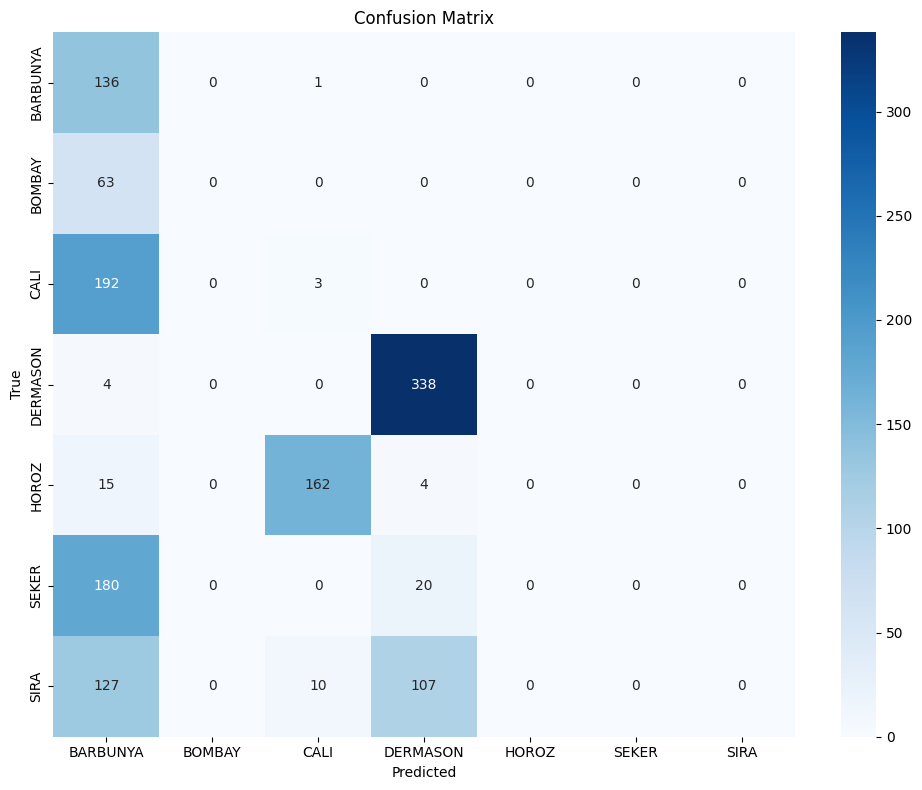

In [ ]:
# Create heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate TP, FN, FP, TN for each class
TP = np.diag(conf_matrix)
FN = np.sum(conf_matrix, axis=0) - TP
FP = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - TP - FN - FP

In [ ]:
# Print the results
print("True Positives (TP):", TP)
print("False Negatives (FN):", FN)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print()

True Positives (TP): [136   0   3 338   0   0   0]
False Negatives (FN): [581   0 173 131   0   0   0]
False Positives (FP): [  1  63 192   4 181 200 244]
True Negatives (TN): [ 644 1299  994  889 1181 1162 1118]



In [ ]:
# Calculate accuracy
acc_score = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy: %.4f%%" % (acc_score * 100))


Accuracy: 35.0220%


In [ ]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print()

Mean Squared Error: 0.3404



In [ ]:
# Calculate precision and recall for each class
precision = precision_score(y_test_labels, y_pred_labels, average=None, zero_division=0)
recall = recall_score(y_test_labels, y_pred_labels, average=None, zero_division=0)

In [ ]:
# Print the precision and recall for each class
for i, (p, r) in enumerate(zip(precision, recall)):
    print(f"Class {class_labels[i]}: Precision = {p:.4f}, Recall = {r:.4f}")

Class BARBUNYA: Precision = 0.1897, Recall = 0.9927
Class BOMBAY: Precision = 0.0000, Recall = 0.0000
Class CALI: Precision = 0.0170, Recall = 0.0154
Class DERMASON: Precision = 0.7207, Recall = 0.9883
Class HOROZ: Precision = 0.0000, Recall = 0.0000
Class SEKER: Precision = 0.0000, Recall = 0.0000
Class SIRA: Precision = 0.0000, Recall = 0.0000


## Exercise 2 : k-fold Cross Validation (20 points)

In order to avoid **using biased models**, use 10-fold cross validation to generalize the model from Ex1.2 on the given data set. You can choose a n_repeats value of 1-5

__Requirements :__
- Print the accuracy values during each iteration of the **cross validation** not the iterations per epoch or the epochs
- Print the overall average accuracy per each n_fold value, look at the documentation for the scoring parameter



In [ ]:
# Wrap the model using KerasClassifier
model = KerasClassifier(model=create_model, epochs=100, batch_size=None, verbose=0)

In [ ]:
# Define the cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=42)

In [ ]:
# Evaluate the model using cross-validation
scores = cross_val_score(model, X_scaled, y_onehot, scoring='accuracy', cv=cv)

In [ ]:
# Print accuracy value for each fold
print("10-fold Cross-Validation Results:")
print("Accuracy per fold:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score*100:.4f}%")

10-fold Cross-Validation Results:
Accuracy per fold:
Fold 1: 90.6021%
Fold 2: 92.9464%
Fold 3: 89.8604%
Fold 4: 90.3012%
Fold 5: 91.9912%
Fold 6: 91.9177%
Fold 7: 93.5342%
Fold 8: 92.5055%
Fold 9: 91.1830%
Fold 10: 90.2278%


In [ ]:
# Print the overall average accuracy
print(f"\nOverall Average Accuracy: {scores.mean()*100:.4f}%")


Overall Average Accuracy: 91.5069%


## Exercise 3 : Hyperparameter Tuning (25 points)

Use either grid search or random search methodology to find the optimal number of nodes required in each hidden layer, as well as the optimal learning rate and the different activation functions or optimization approaches, [keras_tuner examples](https://keras.io/guides/keras_tuner/getting_started/) such that the accuracy of the model is maximum for the given data set.

__Requirements :__
- The set of optimal hyperparameters
- Try your best to maximize accuracy using this set of optimal hyperparameters

__Note :__ Hyperparameter tuning takes a lot of time to execute. Make sure that you choose the appropriate number of each hyperparameter (preferably 3 of each), and that you allocate enough time to execute your code. Make sure to tune at least three parameters with three options each at a minimum, but feel free to experiment with more, just recognize that it will grow exponentially in running time

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.0 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    # Tune the number of units in the first Dense layer
    for i in range(4):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=8, max_value=32, step=8), activation=hp.Choice('activation_' + str(i), values=['relu', 'sigmoid', 'tanh'])))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))
    # Tune the learning rate for the optimizer
    optimizer = hp.Choice('optimizer', values=['sgd', 'adam'])
    if optimizer == 'sgd':
        learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        optimizer = SGD(learning_rate=learning_rate)
    else:
        learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        optimizer = Adam(learning_rate=learning_rate)
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# Set up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

In [ ]:
# Run the tuning process
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Trial 10 Complete [00h 05m 53s]
val_accuracy: 0.2511013150215149

Best val_accuracy So Far: 0.9268232981363932
Total elapsed time: 01h 01m 47s


In [ ]:
# Evaluate the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in each dense layer and the optimal activation functions are:
""")
for i in range(3):
    print(f"Layer {i+1}: {best_hyperparameters.get('units_' + str(i))} units, activation function: {best_hyperparameters.get('activation_' + str(i))}")
print(f"The optimal learning rate for the optimizer is {best_hyperparameters.get('learning_rate')}")
print(f"The optimal optimizer is {best_hyperparameters.get('optimizer')}")


The hyperparameter search is complete. The optimal number of units in each dense layer and the optimal activation functions are:

Layer 1: 24 units, activation function: sigmoid
Layer 2: 32 units, activation function: relu
Layer 3: 32 units, activation function: sigmoid
The optimal learning rate for the optimizer is 0.005188966883351778
The optimal optimizer is adam


In [ ]:
# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hyperparameters)
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4121 - loss: 1.4178 - val_accuracy: 0.8047 - val_loss: 0.5328
Epoch 2/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8257 - loss: 0.4451 - val_accuracy: 0.8590 - val_loss: 0.3442
Epoch 3/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8739 - loss: 0.3394 - val_accuracy: 0.8686 - val_loss: 0.3515
Epoch 4/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8779 - loss: 0.3245 - val_accuracy: 0.8642 - val_loss: 0.3488
Epoch 5/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8869 - loss: 0.2988 - val_accuracy: 0.8678 - val_loss: 0.3273
Epoch 6/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8891 - loss: 0.2981 - val_accuracy: 0.8598 - val_loss: 0.3399
Epoch 7/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8894 - loss: 0.2968 - val_accuracy: 0.8840 - val_loss: 0.3059
Epoch 8/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8955 - loss: 0.2887 - val_accu

In [108]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"The maximum accuracy achieved using this set of optimal hyperparameters is: {test_acc}")
print(f"Test loss: {test_loss}")

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8892 - loss: 0.2889
The maximum accuracy achieved using this set of optimal hyperparameters is: 0.8854625821113586
Test loss: 0.2949880063533783


## Exercise 4 - Collaborative Statement (5 points)

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

Even if you did not use any outside resources or collaborate with anyone, please state that explicitly in the space below.

I worked independently on this assignment and did not collaborate with anyone. I followed the academic honesty guidelines and focused solely on my own analysis and coding practices.